# 60 R² for Scatter Plots

In [42]:
import pickle as pkl
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.nonparametric.smoothers_lowess

In [29]:
cai_dict           = pkl.load(open("../results/cai_dict.p", "rb"), encoding='latin1')
prot_speeds        = pkl.load(open("../results/prot_speeds.p", "rb"), encoding='latin1')
tAI_python_chu     = pkl.load(open("../results/tAI_python_chu.p", "rb"), encoding='latin1')
tic_toc_speed_dict = pkl.load(open("../results/tic_toc_speed_dict.p", "rb"), encoding='latin1')

In [60]:
myedgecolor = 'steelblue'
myfacecolor = 'powderblue'

In [61]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20, 
                  alpha=0.8, xlog=True, ylog=True, xmax=False, ymax=False, xmin=False, ymin=False, rasterized=True):
    #, filename="scatterdict.png"):
    plotkeys = dict1.keys() & dict2.keys() # set intersection
    print(len(plotkeys))
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    #fig =  plt.figure(figsize=(15, 15))                

    #ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    if xmax:
        ax.set_xlim(right=xmax)
    if ymax:
        ax.set_ylim(top=ymax)
    if xmin:
        ax.set_xlim(left=xmin)
    if ymin:
        ax.set_ylim(bottom=ymin)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = statsmodels.nonparametric.smoothers_lowess.lowess(new_ys, new_xs, frac=0.2)[:,1]
    plt.plot(new_xs, ylowess, 'darkred', linewidth=4)

    #ax.set_rasterization_zorder(1)

In [63]:
hfont = {'fontname':'Helvetica'}
csfont = {'fontname':'Computer Modern'}
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

4475
4475
4475
4475


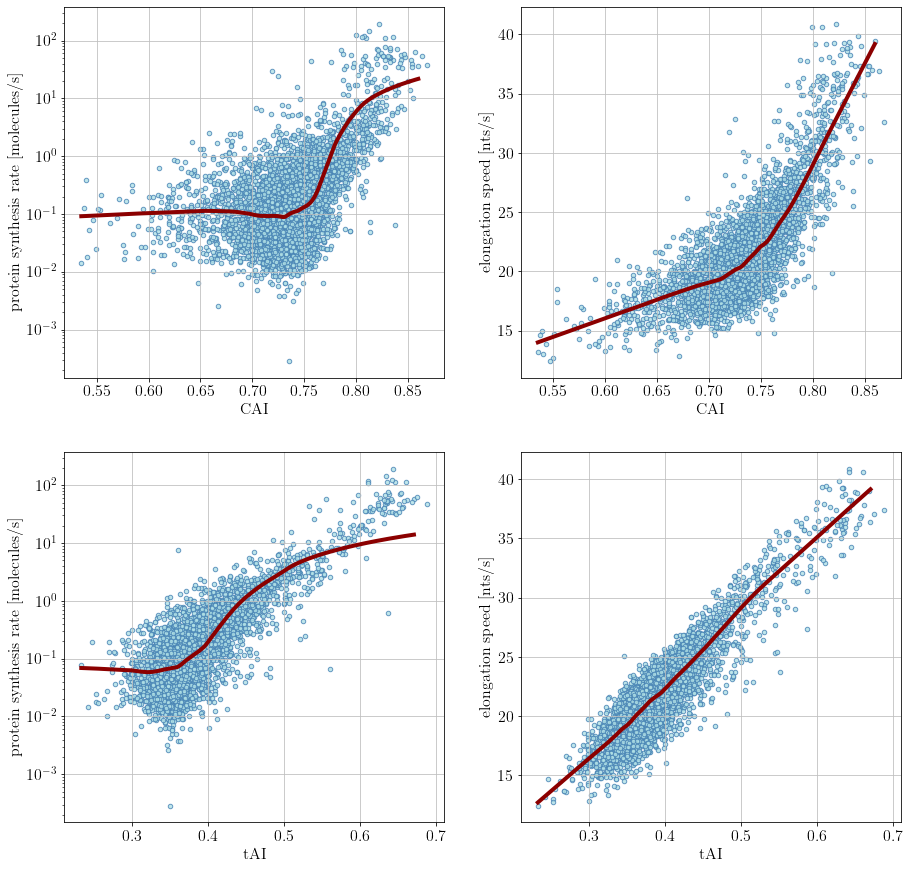

In [64]:
fig =  plt.figure(figsize=(15, 15))          

ax = fig.add_subplot(2, 2, 1)
scatter_dicts(cai_dict, prot_speeds, xaxislabel="CAI", yaxislabel="protein synthesis rate [molecules/s]", fontsize=16, 
              markersize=20, alpha=0.8, xlog=False, ylog=True, xmax=False, ymax=False, rasterized=True)

ax = fig.add_subplot(2, 2, 2)
scatter_dicts(cai_dict, tic_toc_speed_dict, xaxislabel="CAI", yaxislabel="elongation speed [nts/s]", 
              fontsize=16, markersize=20, alpha=0.8, xlog=False, ylog=False, xmax=False, ymax=False, rasterized=True)

ax = fig.add_subplot(2, 2, 3)
scatter_dicts(tAI_python_chu, prot_speeds, xaxislabel="tAI", yaxislabel="protein synthesis rate [molecules/s]", fontsize=16, 
              markersize=20, alpha=0.8, xlog=False, ylog=True, xmax=False, ymax=False, rasterized=True)

ax = fig.add_subplot(2, 2, 4)
scatter_dicts(tAI_python_chu, tic_toc_speed_dict, xaxislabel="tAI", yaxislabel="elongation speed [nts/s]", 
              fontsize=16, markersize=20, alpha=0.8, xlog=False, ylog=False, xmax=False, ymax=False, rasterized=True)


plt.savefig('CAI_tAI_vs_speed.pdf', bbox_inches='tight', dpi=200)